# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [3]:
# student 1: Ido Ben Yishay 7948
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [6]:
# טעינת קבצי הנתונים
train_data = pd.read_csv('C:/Files/לימודים/מטלה 2 למידת מכונה/titanic_train.csv')
test_data = pd.read_csv('C:/Files/לימודים/מטלה 2 למידת מכונה/titanic_test.csv')

#הדפסת 5 השורות הראשונות
print("Train data - 5 first rows:")
print(train_data.head())
print("Test data - 5 first rows:")
print(test_data.head())





Train data - 5 first rows:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0
Test data - 5 first rows:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


Train data statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.

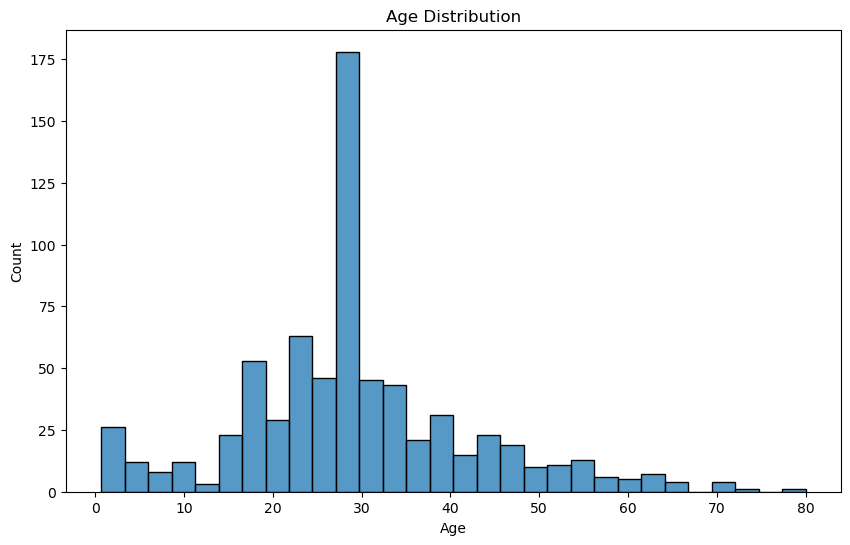

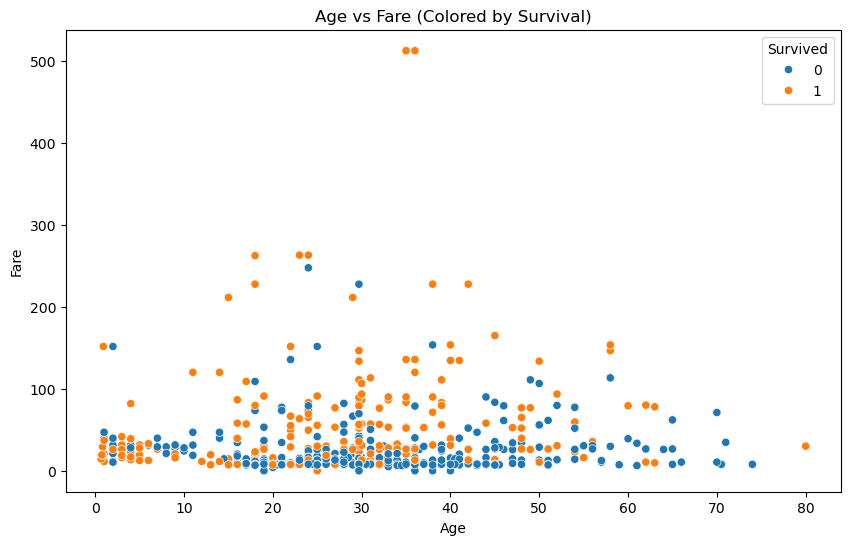

In [7]:
#סטטיסטיקות כלליות 
print("Train data statistics:")
print(train_data.describe()) 
#התפלגות השורדים והלא שורדים 
print("Survived Distribution in Train Data:")
print(train_data['Survived'].value_counts())

#היסטוגרמה של גיל הנוסעים
plt.figure(figsize=(10,6))
sns.histplot(train_data['Age'].dropna(),bins=30)
plt.title('Age Distribution')
plt.show()

#תרשים פיזור בין גיל הנוסע למחיר הכרטיס שלו + אם שרד או לא
plt.figure(figsize=(10,6))
sns.scatterplot(x=train_data['Age'],y=train_data['Fare'], hue=train_data['Survived'])
plt.title('Age vs Fare (Colored by Survival)')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [9]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [10]:
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.transform(test_data['Sex'])
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
test_data['Embarked'] = le.transform (test_data['Embarked'])


In [11]:
X_train = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = train_data['Survived']
X_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [14]:
rf_model = RandomForestClassifier()
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}

In [15]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [16]:
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best RF cross-validation score: ", grid_search_rf.best_score_)

Best parameters for Random Forest:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best RF cross-validation score:  0.8244164286417808


## Part 5 - Apply on test and show model performance estimation

In [18]:
svm_model = SVC()
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)
print("Best parameters for SVM: ", grid_search_svm.best_params_)
print("Best SVM cross-validation score: ", grid_search_svm.best_score_)

Best parameters for SVM:  {'C': 1, 'kernel': 'rbf'}
Best SVM cross-validation score:  0.8202206244459767


In [19]:
rf_best_score = grid_search_rf.best_score_
svm_best_score = grid_search_svm.best_score_
print("Best Random Forest score: ", rf_best_score)
print("Best SVM score: ", svm_best_score)

Best Random Forest score:  0.8244164286417808
Best SVM score:  0.8202206244459767


In [20]:
#בחירת המודל הטוב ביותר
if rf_best_score > svm_best_score:
    best_model = grid_search_rf.best_estimator_
    print("Selected Model: Random Forest")
else:
    best_model = grid_search_svm.best_estimator_
    print("Selected Model: SVM")



Selected Model: Random Forest


In [21]:
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)


In [22]:
# הצגת תוצאות חיזוי
print("First 5 Predictions on Test Data:")
print(y_pred[:5])

# בדיקת איכות המודל
print("Classification Report (Train Data):")
print(classification_report(y_train, best_model.predict(X_train_scaled)))

First 5 Predictions on Test Data:
[0 0 0 1 1]
Classification Report (Train Data):
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       431
           1       0.92      0.79      0.85       281

    accuracy                           0.89       712
   macro avg       0.90      0.87      0.88       712
weighted avg       0.89      0.89      0.89       712

